In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [22]:
import warnings
import sys
sys.path.append('../scripts')
from Data_cleaning_pipline import *
from visualize_data import *

In [23]:
# Suppress all warnings
warnings.simplefilter("ignore")

In [24]:
# Define the external path where you want to save the log file
log_dir = "C:/Users/elbet/OneDrive/Desktop/Ten/Predictive_Pharmaceutical_data_analysis/"
log_file = "exploratory_analysis.log"

# Ensure the directory exists
os.makedirs(log_dir, exist_ok=True)

# Set up logging configuration with the external file path
# filemode='w' will overwrite the existing file
logging.basicConfig(level=logging.INFO,
                    filename=os.path.join(log_dir, log_file),
                    filemode='w',  # Overwrites the log file if it already exists
                    format="%(asctime)s - %(levelname)s - %(message)s")

In [25]:
import warnings
# File paths
train_path = 'C:/Users/elbet/OneDrive/Desktop/Ten/Data/rossmann-store-sales/train.csv'
test_path = 'C:/Users/elbet/OneDrive/Desktop/Ten/Data/rossmann-store-sales/test.csv'
store_path = 'C:/Users/elbet/OneDrive/Desktop/Ten/Data/rossmann-store-sales/store.csv'

# Load data
train, test = load_data(train_path, test_path, store_path)
logging.info("Datasets loaded successfully")

train_cleaned = clean_data(train)
test_cleaned = clean_test_data(test)


In [26]:
print("Train columns:", train_cleaned.columns)
print("Test columns:", test_cleaned.columns)

Train columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Test columns: Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [27]:
train_cleaned.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    319991
CompetitionOpenSinceYear     319991
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

In [28]:
test_cleaned.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
dtype: int64

### Data visualization

In [29]:
print(train.columns)
print(test.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


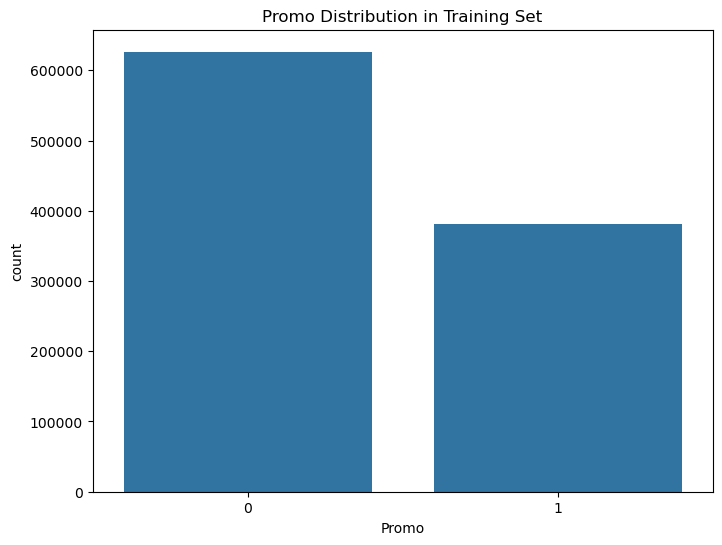

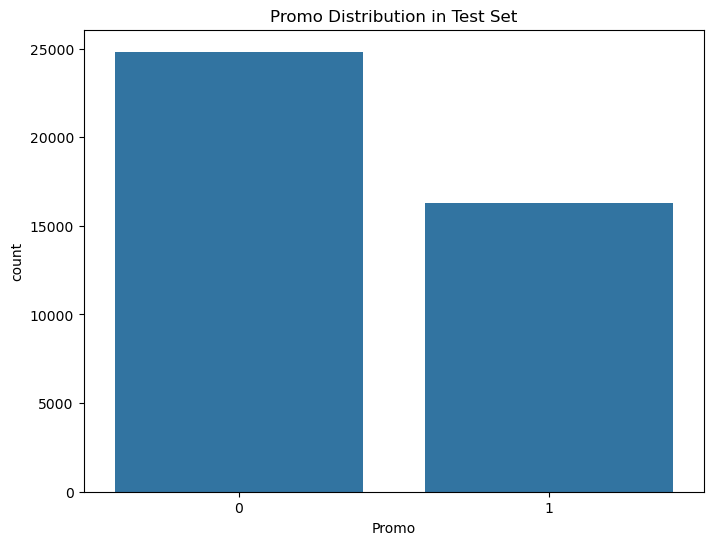

In [30]:
# Promo distribution in train and test sets
 # Perform EDA
promo_distribution(train_cleaned, "Training")
promo_distribution(test_cleaned, "Test")

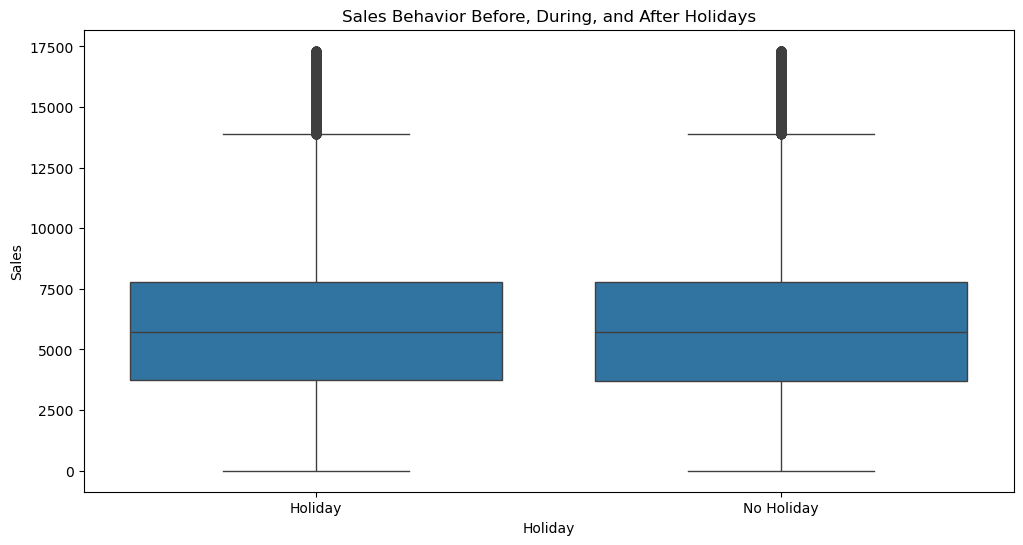

In [31]:
#sales behavior before, during, and after holidays
# Assuming `StateHoliday` and `SchoolHoliday` indicate holiday periods
sales_holiday_behavior(train_cleaned)

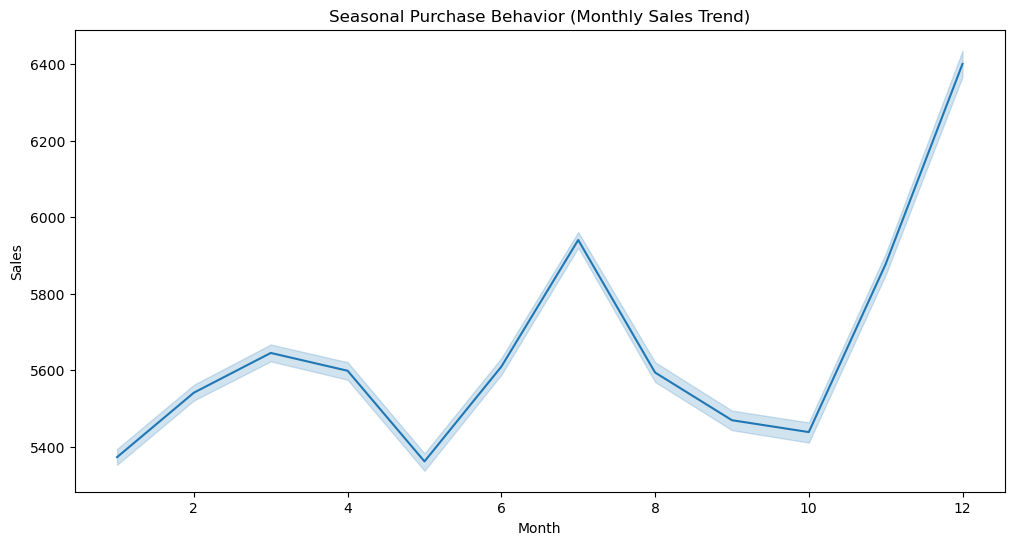

In [32]:
## 3. Seasonal purchase behaviors (e.g., Christmas, Easter)
seasonal_sales_behavior(train_cleaned)
    

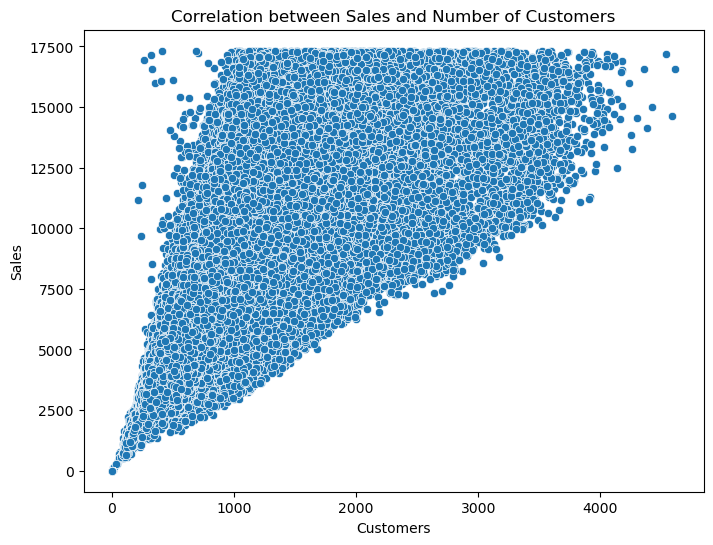

In [33]:
## 4. Correlation between sales and number of customers
sales_customers_correlation(train_cleaned)
    

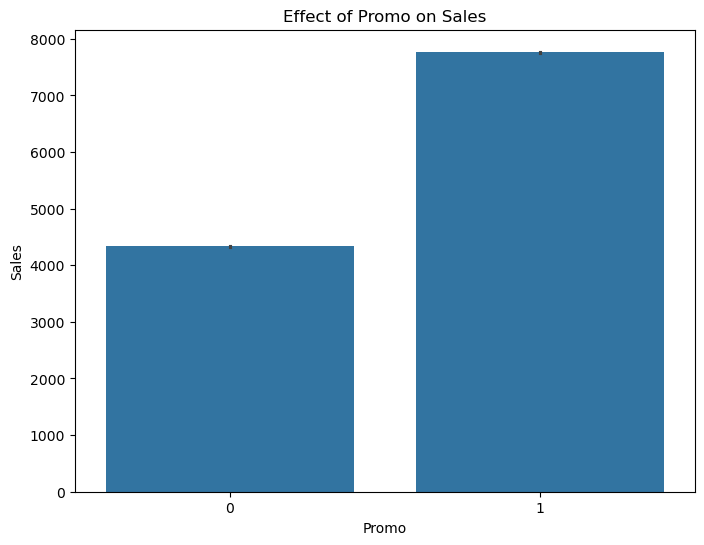

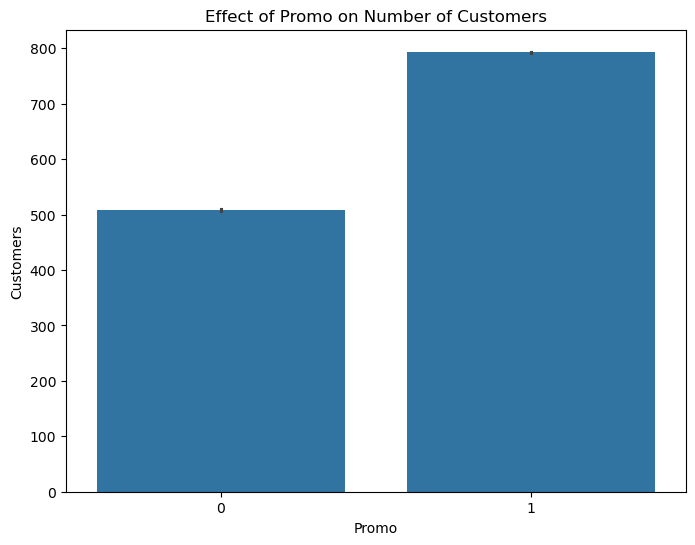

In [34]:
## 5. Promo effect on sales (Are promos attracting more customers?)
promo_effect(train_cleaned)


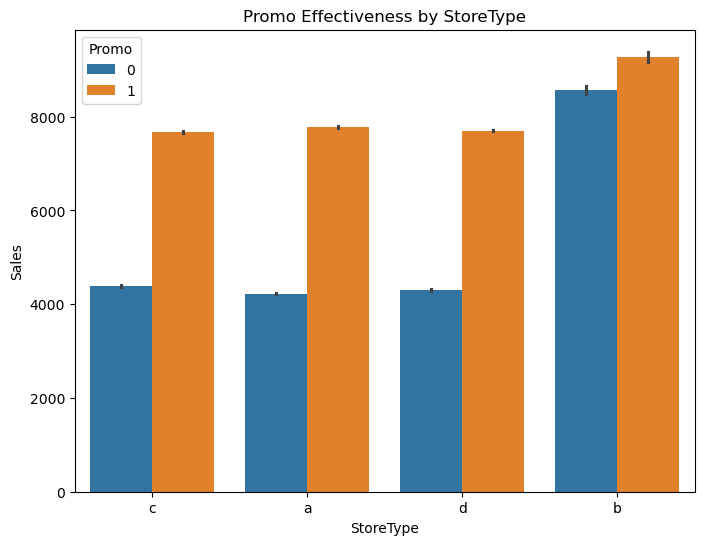

In [35]:
## 6. Deploying promos more effectively (e.g., by StoreType)
store_type_promo_effectiveness(train_cleaned)
   

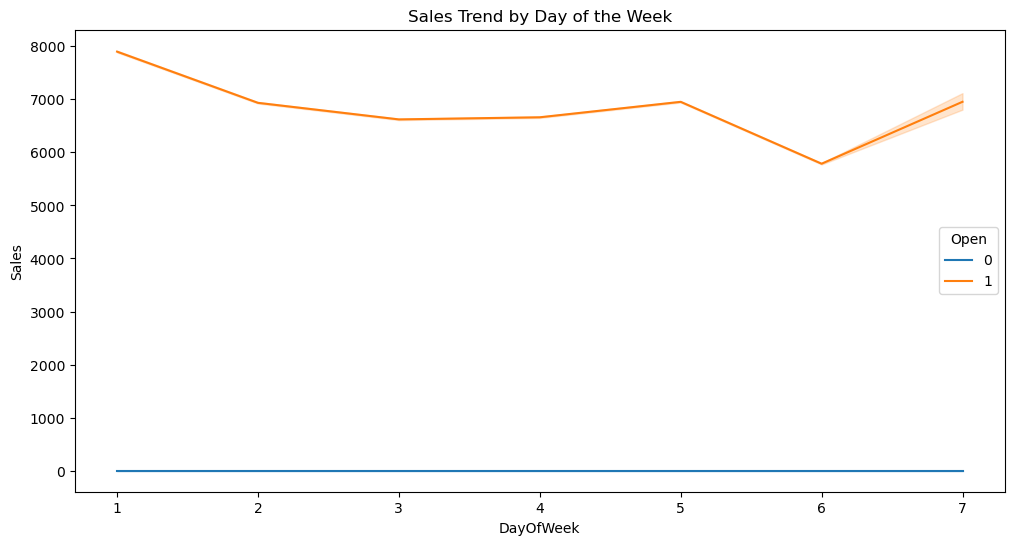

In [36]:
## 7. Trends of customer behavior during store opening and closing times
sales_trend_open(train_cleaned)   

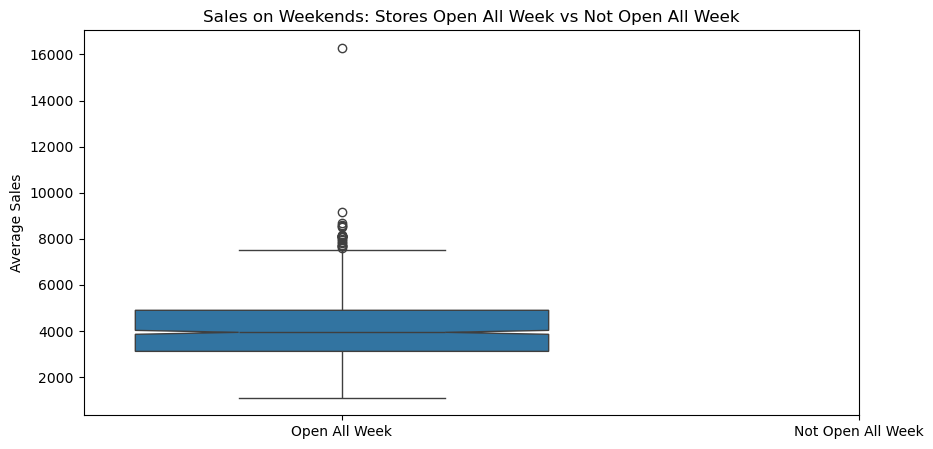

In [37]:
## 8. Stores open all weekdays vs weekend sales
weekend_sales_comparison(train_cleaned)

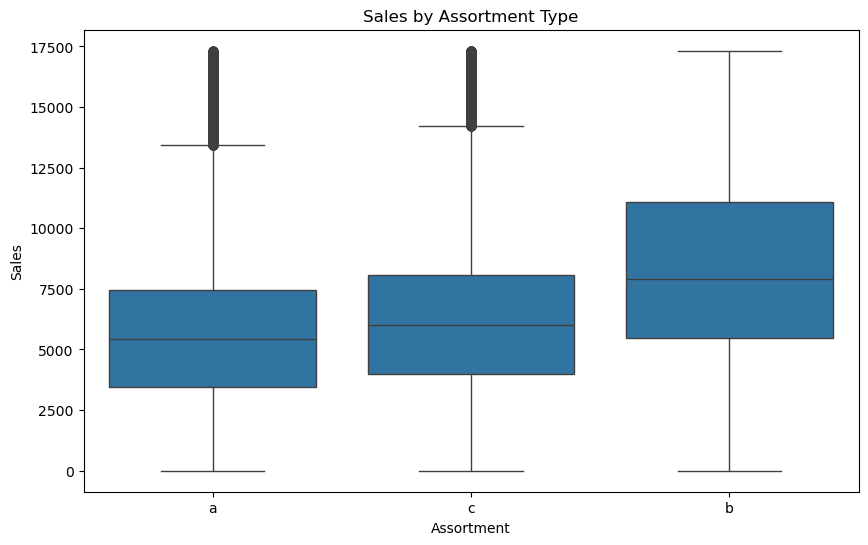

In [38]:
## 9. Assortment type effect on sales
assortment_sales_effect(train_cleaned)

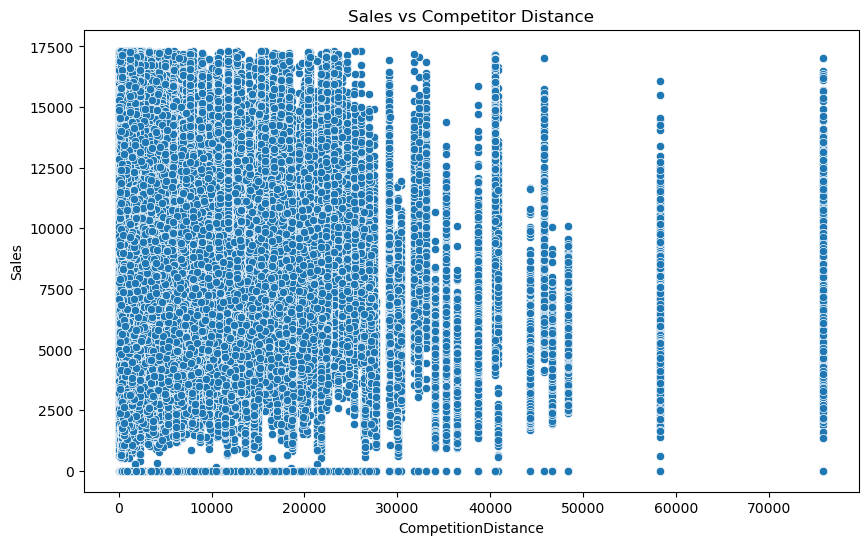

In [39]:
## 10. Competitor distance effect on sales
competitor_distance_effect(train_cleaned)
    

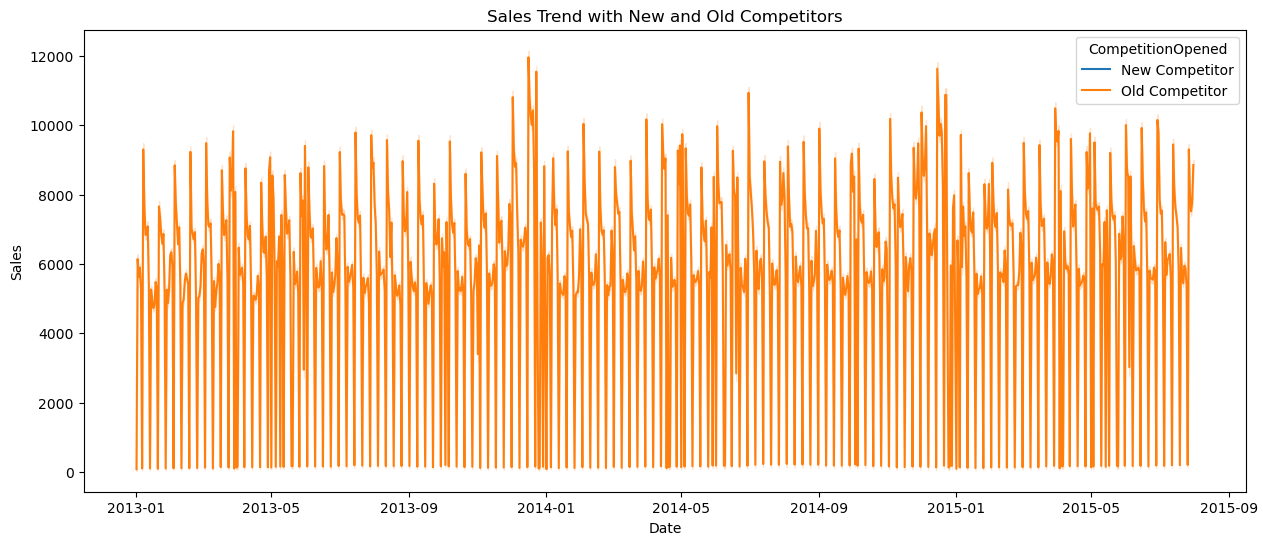

In [40]:
## 11. Opening or reopening of competitors
sales_competition_trend(train_cleaned)
    

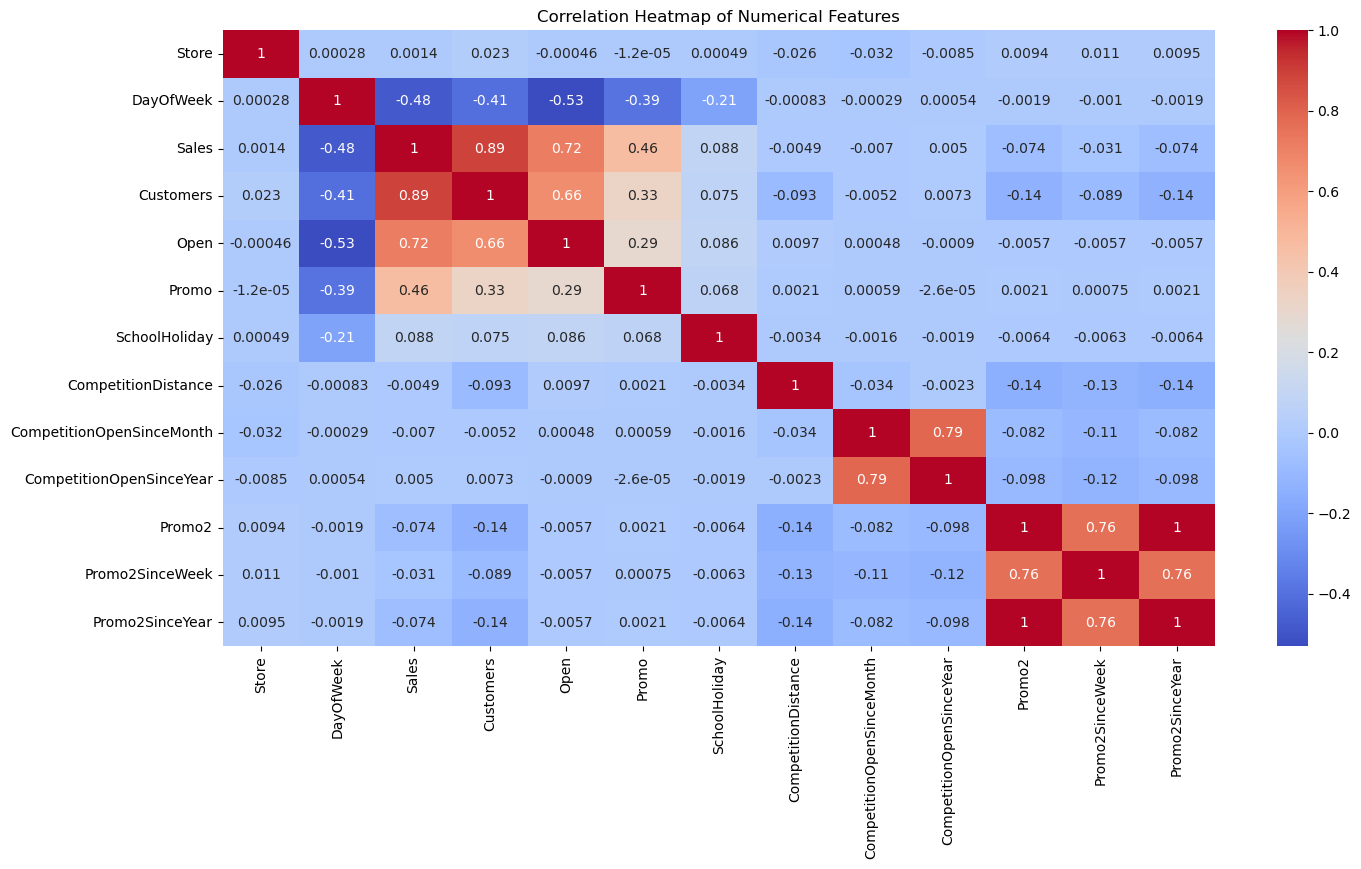

In [41]:
### Correlation Heatmap ###
correlation_heatmap(train_cleaned)